In [2]:
# Imports dependencies
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [4]:
# connects to postgres sever and database
conn = psycopg2.connect(
    host="db-inst-on-aws.cve4fghw24yv.us-east-2.rds.amazonaws.com",
    database="nfl-final-project",
    user="root",
    # password variable used for connection 
    password="password")

In [4]:
# Queryies salary table 
salary = pd.read_sql('Select * FROM public."offense"', conn)
# creates bins for histogram
bins = 5
# plots and labels histogram 
# plt.hist(salary["salary"], bins, facecolor='blue')
# plt.xlabel('# of Employes')
# plt.ylabel('Salary')
# plt.title('Salary Histogram')
# plt.show()
salary

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [62]:
# Queries employees and titles tables 
emp = pd.read_sql('Select * FROM public."Employees"', conn)
title = pd.read_sql('Select * FROM public."Title"', conn)
# renames columns so that it matches for merging 
emp = emp.rename(columns={"emp_title": "title_id"})
emp

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,9/22/1959,Percy,Samarati,F,1994-09-08


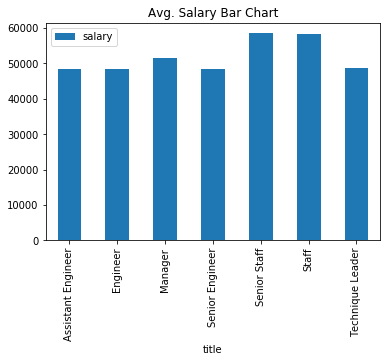

In [82]:
# merges the three tables 
merged_db = pd.merge(emp, title, on="title_id", how="inner")
merged_db = pd.merge(merged_db, salary, on="emp_no", how="inner")
# groups by title
grouped_db= merged_db.groupby("title")
# creates bar chart based on mean salary by title
fig = grouped_db.mean().plot(kind="bar", y="salary", title="Avg. Salary Bar Chart")